## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = '/Users/taraross/Desktop/all/DataAnalytics/Tasks/Achievement 6'

In [5]:
df = pd.read_csv(os.path.join(path, 'USETHIS', 'listings_clean.csv'))

## Data Cleaning

In [6]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,4952,Place to stay in Palo Alto · ★4.81 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43932,-122.15741,Private room,65.0,7,84,10/28/23,0.48,5,253,7
1,1,11464,Rental unit in Santa Clara · ★4.50 · Studio · ...,42458,Emey,Santa Clara,37.34415,-121.98701,Entire home/apt,94.0,3,20,8/5/23,0.17,13,152,4
2,2,21373,Place to stay in Palo Alto · ★4.87 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43972,-122.15532,Private room,67.0,7,266,9/16/23,1.61,5,300,5
3,3,62799,Place to stay in Palo Alto · ★4.89 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43934,-122.15723,Private room,83.0,7,157,12/16/23,1.35,5,309,6
4,4,75284,Place to stay in Palo Alto · ★4.87 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43923,-122.15745,Private room,70.0,7,214,12/11/23,1.39,5,302,6


In [9]:
df= df.drop('Unnamed: 0', axis =1)

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,4952,Place to stay in Palo Alto · ★4.81 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43932,-122.15741,Private room,65.0,7,84,10/28/23,0.48,5,253,7
1,11464,Rental unit in Santa Clara · ★4.50 · Studio · ...,42458,Emey,Santa Clara,37.34415,-121.98701,Entire home/apt,94.0,3,20,8/5/23,0.17,13,152,4
2,21373,Place to stay in Palo Alto · ★4.87 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43972,-122.15532,Private room,67.0,7,266,9/16/23,1.61,5,300,5
3,62799,Place to stay in Palo Alto · ★4.89 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43934,-122.15723,Private room,83.0,7,157,12/16/23,1.35,5,309,6
4,75284,Place to stay in Palo Alto · ★4.87 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43923,-122.15745,Private room,70.0,7,214,12/11/23,1.39,5,302,6


In [11]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [12]:
dups = df.duplicated()

In [13]:
dups.shape # No dups

(4845,)

/var/folders/_p/wjzjhv4d3_d8lbx7d_th7l740000gp/T/ipykernel_77260/1302738382.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=25) # Shows extreme values
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

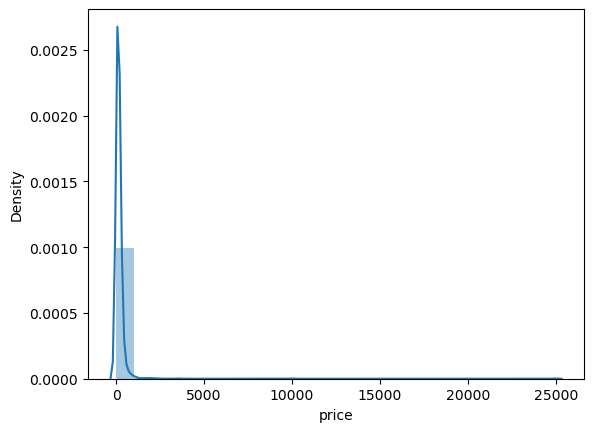

In [14]:
sns.distplot(df['price'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [15]:
df['price'].max() # Check the max

25000.0

In [16]:
df['price'].min()

10.0

In [17]:
df['price'].median() # Check the median

115.0

In [18]:
df['price'].mean() # Check the mean

180.5277605779154

In [23]:
current = df[df['price'] <1000]

In [24]:
current.shape

(4796, 16)

In [25]:
df.shape

(4845, 16)

/var/folders/_p/wjzjhv4d3_d8lbx7d_th7l740000gp/T/ipykernel_77260/3754765101.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(current['price'], bins=25) # Shows extreme values
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

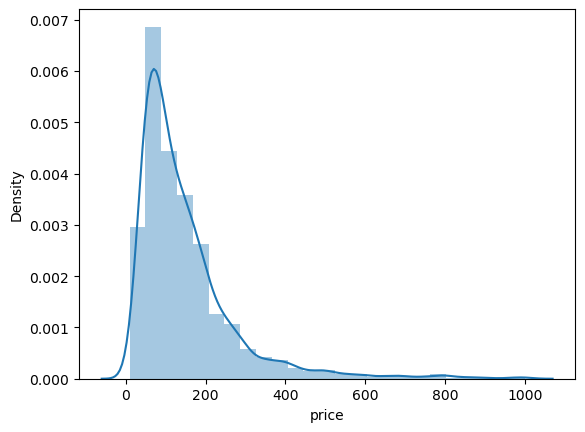

In [26]:
sns.distplot(current['price'], bins=25) # Shows extreme values

In [27]:
### Going to use 'current' for the lack of outliers

## Data Prep for Regression Analysis

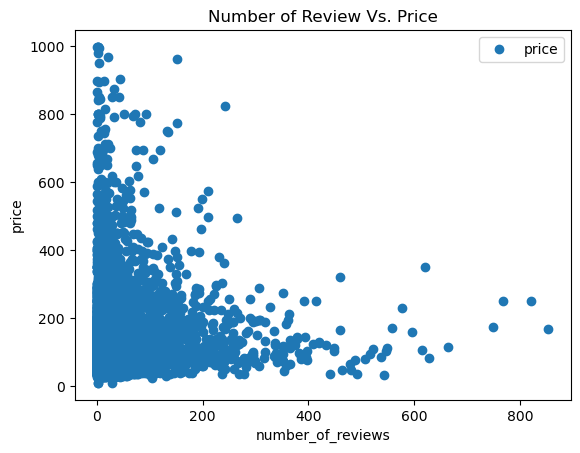

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

current.plot(x = 'number_of_reviews', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Review Vs. Price')  
plt.xlabel('number_of_reviews')  
plt.ylabel('price')  
plt.show()

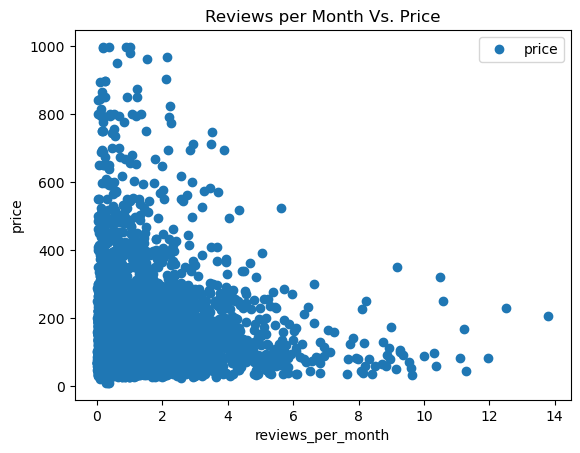

In [42]:
# Reviews per month scatterplot

current.plot(x = 'reviews_per_month', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Reviews per Month Vs. Price')  
plt.xlabel('reviews_per_month')  
plt.ylabel('price')  
plt.show()

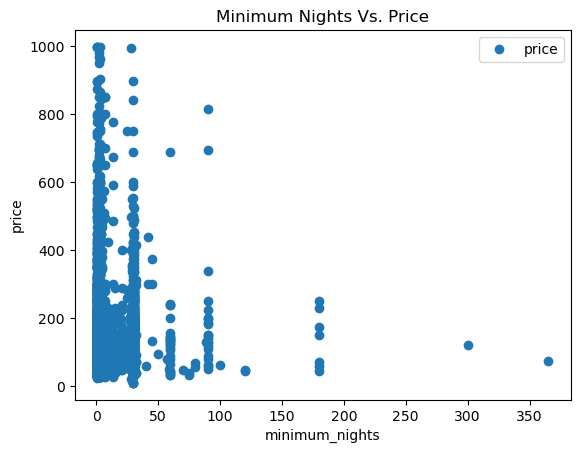

In [43]:
# Minimum Nights Scatterplot

current.plot(x = 'minimum_nights', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Minimum Nights Vs. Price')  
plt.xlabel('minimum_nights')  
plt.ylabel('price')  
plt.show()

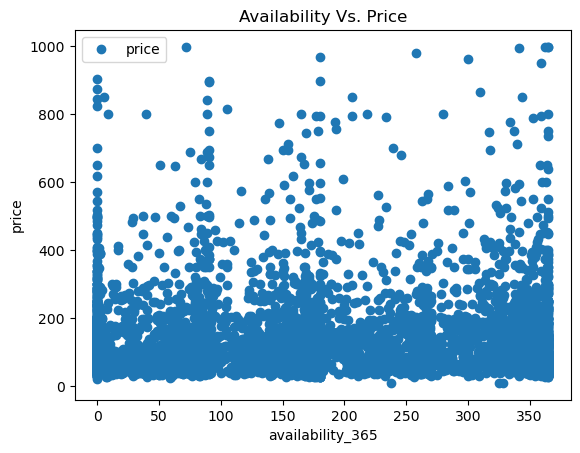

In [44]:
# Availability Scatterplot

current.plot(x = 'availability_365', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Availability Vs. Price')  
plt.xlabel('availability_365')  
plt.ylabel('price')  
plt.show()

After looking at the different scatterplots of data, I think the two variables that I could potentionally get any results out of is "number_of_reviews" vs "price".  So I will be continuing the exercise with those variables.

Looking at the scatterplot my hypothesis would be that there is a negative correlation between the two variables.  The price is higher when there are less reviews.

In [55]:
X = current['number_of_reviews'].values.reshape(-1,1)
y = current['price'].values.reshape(-1,1)

In [56]:
X

array([[ 84],
       [ 20],
       [266],
       ...,
       [  3],
       [  3],
       [  1]])

In [57]:
y

array([[ 65.],
       [ 94.],
       [ 67.],
       ...,
       [106.],
       [ 42.],
       [ 38.]])

In [58]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [59]:
regression = LinearRegression()

In [60]:
regression.fit(X_train, y_train)

LinearRegression()

In [61]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

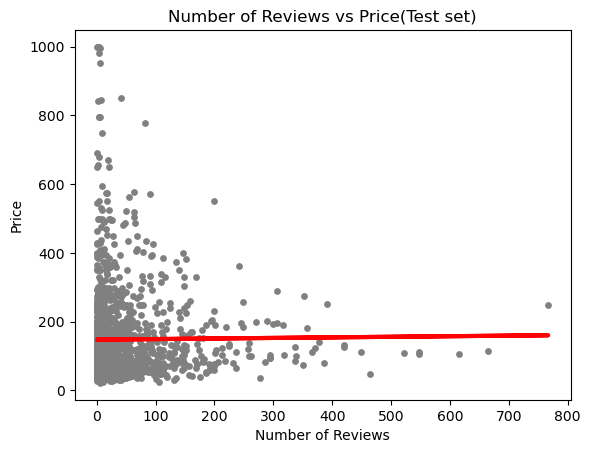

In [62]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Reviews vs Price(Test set)')
plot_test.xlabel('Number of Reviews')
plot_test.ylabel('Price')
plot_test.show()

Looking at the scatterplot, I can see a very slight negative correlation.  However since the line is pretty flat, I would say that these variables most likely have no correlation with each other.

In [63]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [64]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01660951]]
Mean squared error:  17171.882438718985
R2 score:  -0.001151911262683658


In [65]:
y_predicted

array([[147.8862647 ],
       [148.68352139],
       [149.11536876],
       ...,
       [148.79978799],
       [147.8862647 ],
       [148.05235985]])

In [68]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(15)

,Actual,Predicted
0,142.0,147.886265
1,66.0,148.683521
2,35.0,149.115369
3,74.0,147.902874
4,49.0,148.251674
5,65.0,148.052360
6,70.0,148.450988
7,169.0,147.886265
8,198.0,148.235065
9,295.0,149.098759


The regression analysis conducted to explore the correlation between the number of reviews and the price of an Airbnb listing yielded a slope of 0.0166.  This indicates a very weak positive relationship betweent the two variables. However, the high MSE of 17171.88 suggests a significant discrepancy between the actual and predicted values, indicationg poor predictive performance.  Moreover, the R2 score of -0.00115 is extremely close to zero implying that the model explains virtually none of the variance in the dependent variable.  This negative R2 score furthet confirms that the linear regression model is not a good fit for the data and that a straight regression line fails to accurately capture the relationship between the number of reviews and the price of listings.  Therefore alternative models or additional variables might be needed to improve the predictive power of the analysis.